In [2]:
# pip install ipython
# pip install pillow
# pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from PIL import Image as Image2

import tushare as ts
import datetime
from datetime import datetime as dtime
import mpl_finance as mpf
import seaborn as sns
from matplotlib.pylab import date2num
import talib

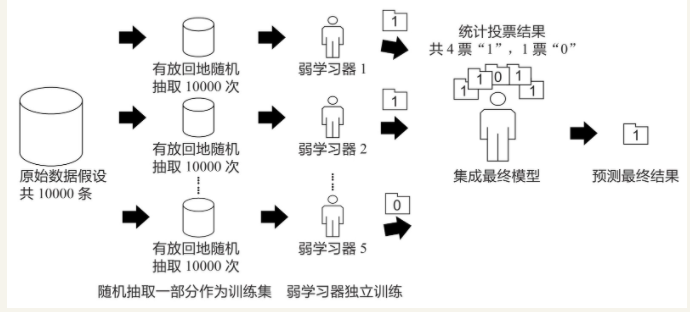

In [3]:
'''
What is bagging in one graph?
'''

Image(filename = "bagging.png", width = 700, height = 700)

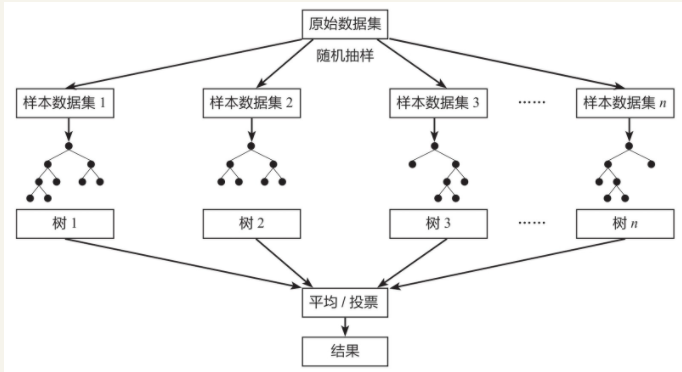

In [4]:
'''
What is random forest in one graph?
'''

Image(filename = "randomForest.png", width = 700, height = 700)

In [5]:
'''
注意,RF不光数据集随机,特征也是随机采样;

RF同样分为 RFClassifier 与 RFRegressor.
'''

# Random Forest Classifier Model
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [0, 0, 0, 1, 1]

rf_class_model = RandomForestClassifier(n_estimators=10, random_state=123)
rf_class_model.fit(X, y)

print(rf_class_model.predict([[5, 5]]))

[0]


In [6]:
# Random Forest Regression Model
XX = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
yy = [1, 2, 3, 4, 5]

rf_reg_model = RandomForestRegressor(n_estimators=10, random_state=123)
rf_reg_model.fit(XX, yy)

print(rf_reg_model.predict([[5, 5]]))

[2.8]


In [7]:
'''
股价预测
'''

stock_df = ts.get_hist_data('000158', start='2018-01-01', end='2021-01-15')
stock_df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2021-01-15,5.68,5.84,5.65,5.62,147666.48,-0.04,-0.70,5.702,5.828,6.068,173241.90,213413.51,185220.75,0.94
2021-01-14,5.53,5.82,5.69,5.53,184430.41,0.09,1.61,5.752,5.883,6.128,213411.71,210023.23,186837.15,1.17
2021-01-13,5.72,5.73,5.60,5.53,192454.23,-0.14,-2.44,5.732,5.926,6.178,236944.56,203381.46,186703.61,1.22
2021-01-12,5.76,5.91,5.74,5.69,169134.16,-0.09,-1.54,5.788,5.984,6.241,255738.59,203403.05,184927.38,1.07
2021-01-11,5.93,6.05,5.83,5.80,172524.20,-0.07,-1.19,5.874,6.010,6.299,251950.29,205099.00,184068.14,1.10


In [8]:
# 用get_k_data只收集少数特征
less_df = ts.get_k_data('000158', start='2018-01-01', end='2021-01-15')
less_df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2018-01-02,7.900,7.979,7.989,7.840,65202.0,000158
1,2018-01-03,8.009,8.356,8.376,7.989,155084.0,000158
2,2018-01-04,8.336,8.187,8.346,8.148,104094.0,000158
3,2018-01-05,8.148,8.098,8.187,8.058,52415.0,000158
4,2018-01-08,8.227,8.197,8.366,8.158,93341.0,000158


In [9]:
# 将date列作为样本索引列
less_df = less_df.set_index('date')  # 或者写成：df.set_index('date', inplace=True)
less_df.head()

,open,close,high,low,volume,code
date,,,,,,
2018-01-02,7.900,7.979,7.989,7.840,65202.0,000158
2018-01-03,8.009,8.356,8.376,7.989,155084.0,000158
2018-01-04,8.336,8.187,8.346,8.148,104094.0,000158
2018-01-05,8.148,8.098,8.187,8.058,52415.0,000158
2018-01-08,8.227,8.197,8.366,8.158,93341.0,000158


In [10]:
# 获取分钟级别数据
min_df = ts.get_hist_data('000158', ktype='5')
min_df.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2021-01-18 15:00:00,5.69,5.69,5.69,5.68,4201.00,0.00,0.00,5.688,5.693,5.7030,3910.9,2965.35,2513.47,0.03
2021-01-18 14:55:00,5.70,5.70,5.68,5.68,5933.00,-0.02,-0.35,5.692,5.694,5.7050,3417.3,2676.85,2492.47,0.04
2021-01-18 14:50:00,5.69,5.70,5.70,5.68,3350.51,0.01,0.18,5.694,5.697,5.7075,2604.1,2360.75,2303.72,0.02
2021-01-18 14:45:00,5.69,5.69,5.68,5.68,2127.00,-0.01,-0.18,5.694,5.696,5.7085,2360.8,2252.40,2244.10,0.01
2021-01-18 14:40:00,5.71,5.71,5.69,5.69,3943.00,-0.02,-0.35,5.696,5.699,5.7105,2511.8,2237.20,2405.85,0.02


In [11]:
# 实时数据
rl_time_df = ts.get_realtime_quotes('000158')

# 选取具体特征
rl_time_df = rl_time_df[['code','name','price','bid','ask','volume','amount','time']]
rl_time_df

,code,name,price,bid,ask,volume,amount,time
0,000158,常山北明,5.690,5.680,5.690,13843179,78794105.970,15:00:03


In [12]:
# 同时获得多支股票实时数据
mult_rl_time_df = ts.get_realtime_quotes(['300264','300324','000158'])
mult_rl_time_df

,name,open,pre_close,price,high,low,bid,ask,volume,amount,...,a2_p,a3_v,a3_p,a4_v,a4_p,a5_v,a5_p,date,time,code
0,佳创视讯,3.110,3.110,3.320,3.380,3.080,3.310,3.320,10830400,35173781.320,...,3.330,360,3.340,255,3.350,292,3.360,2021-01-18,15:35:00,300264
1,旋极信息,3.830,3.830,3.870,3.950,3.810,3.870,3.880,29896518,116269123.420,...,3.890,3895,3.900,690,3.910,893,3.920,2021-01-18,15:35:00,300324
2,常山北明,5.620,5.650,5.690,5.750,5.580,5.680,5.690,13843179,78794105.970,...,5.700,1202,5.710,1036,5.720,1196,5.730,2021-01-18,15:00:03,000158


In [13]:
# 分笔成交记录
df_discrete = ts.get_tick_data('000158', date='2021-01-15', src='tt')
df_discrete.head()

,time,price,change,volume,amount,type
0,09:25:00,5.68,-0.01,225,127800,卖盘
1,09:30:00,5.67,-0.01,41,23247,卖盘
2,09:30:05,5.68,0.01,553,313663,买盘
3,09:30:06,5.67,-0.01,81,45947,卖盘
4,09:30:10,5.67,0.00,437,247779,买盘


In [14]:
# 上证指数数据(实时)
sh_index_df = ts.get_index()
sh_index_df.head()

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,0.84,3554.7977,3566.3778,3596.2237,3608.7665,3544.2614,301652565,4517.4070
1,000002,Ａ股指数,0.84,3726.0980,3738.2548,3769.5856,3782.7491,3715.0501,301378340,4512.0821
2,000003,Ｂ股指数,0.04,250.6450,250.6612,250.7707,251.2719,249.9030,226496,1.4076
3,000008,综合指数,0.59,3115.4081,3118.3687,3136.8393,3152.1479,3108.2333,70018923,958.6115
4,000009,上证380,1.33,5856.5618,5862.5936,5940.6651,5951.7887,5839.2694,63187321,873.4517


In [15]:
'''
衍生变量生成
'''

less_df.tail(10)

,open,close,high,low,volume,code
date,,,,,,
2021-01-04,6.21,6.23,6.32,6.13,180698.0,000158
2021-01-05,6.17,6.17,6.28,6.11,150193.0,000158
2021-01-06,6.16,5.88,6.16,5.84,286424.0,000158
2021-01-07,5.88,5.59,5.88,5.50,302095.0,000158
2021-01-08,5.59,5.90,6.04,5.46,348516.0,000158
2021-01-11,5.93,5.83,6.05,5.80,172524.0,000158
2021-01-12,5.76,5.74,5.91,5.69,169134.0,000158
2021-01-13,5.72,5.60,5.73,5.53,192454.0,000158
2021-01-14,5.53,5.69,5.82,5.53,184430.0,000158


In [16]:
'''
简单的衍生变量
'''

less_df['日内涨幅'] = (less_df['close'] - less_df['open'])/less_df['open']*100 #日内涨幅
less_df['日内震幅'] = (less_df['high'] - less_df['low'])/less_df['low']*100 #日震幅

less_df['昨日收盘价'] = less_df['close'].shift(1)  # 该列所有往下移一行形成昨日收盘价
less_df['日涨'] = less_df['close']-less_df['昨日收盘价'] #日涨幅(较前一交易日收盘价)
less_df['日涨幅'] = (less_df['close']-less_df['昨日收盘价'])/less_df['昨日收盘价']\
*100 #日涨幅(较前一交易日收盘价)

less_df.tail()

,open,close,high,low,volume,code,日内涨幅,日内震幅,昨日收盘价,日涨,日涨幅
date,,,,,,,,,,,
2021-01-11,5.93,5.83,6.05,5.80,172524.0,000158,-1.686341,4.310345,5.90,-0.07,-1.186441
2021-01-12,5.76,5.74,5.91,5.69,169134.0,000158,-0.347222,3.866432,5.83,-0.09,-1.543739
2021-01-13,5.72,5.60,5.73,5.53,192454.0,000158,-2.097902,3.616637,5.74,-0.14,-2.439024
2021-01-14,5.53,5.69,5.82,5.53,184430.0,000158,2.893309,5.244123,5.60,0.09,1.607143
2021-01-15,5.68,5.65,5.84,5.62,147666.0,000158,-0.528169,3.914591,5.69,-0.04,-0.702988


In [17]:
# 日均线
# MA5 > MA10, 上涨趋势
less_df['MA5'] = less_df['close'].rolling(5).mean()
less_df['MA10'] = less_df['close'].rolling(10).mean()

less_df.tail(5)  # head(15)表示展示前15行，因为要展示10行以上，才能看到MA10有值

,open,close,high,low,volume,code,日内涨幅,日内震幅,昨日收盘价,日涨,日涨幅,MA5,MA10
date,,,,,,,,,,,,,
2021-01-11,5.93,5.83,6.05,5.80,172524.0,000158,-1.686341,4.310345,5.90,-0.07,-1.186441,5.874,6.010
2021-01-12,5.76,5.74,5.91,5.69,169134.0,000158,-0.347222,3.866432,5.83,-0.09,-1.543739,5.788,5.984
2021-01-13,5.72,5.60,5.73,5.53,192454.0,000158,-2.097902,3.616637,5.74,-0.14,-2.439024,5.732,5.926
2021-01-14,5.53,5.69,5.82,5.53,184430.0,000158,2.893309,5.244123,5.60,0.09,1.607143,5.752,5.883
2021-01-15,5.68,5.65,5.84,5.62,147666.0,000158,-0.528169,3.914591,5.69,-0.04,-0.702988,5.702,5.828


In [18]:
'''
用TA-lib库生成衍生变量

下载推荐使用加州大学的python扩展库,
地址：https://www.lfd.uci.edu/~gohlke/pythonlibs/
进入网址后Ctrl + F键搜索“ta_lib”

选择对应的文件TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl
(cp后的37表示的是Python3.7版本)下载到自己选择的文件夹,
下载时也要根据自己Python的版本进行下载. (cmd -> python)

下载完成后，在自己选择的文件夹中（例如“C:\机器学习与大数据分析\随机森林”),
在搜索框中输入cmd后按一下Enter回车键搜索
pip install TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl
'''

# N日RSI =N日内收盘涨幅的平均值/(N日内收盘涨幅均值+N日内收盘跌幅均值) ×100
# 即以向上的力量与向下的力量进行比较,(通常在20~80之间)
# 若向上的力量较大，则计算出来的指标上升(>80超买);
# 若向下的力量较大，则指标下降,(<20超卖)由此测算出市场走势的强弱
less_df['RSI'] = talib.RSI(less_df['close'], timeperiod=12)

# MOM(momentum) 反映了一段时期内股价的涨跌速度
# MOM = 当日收盘价 - n天前的收盘价
less_df['MOM'] = talib.MOM(less_df['close'], timeperiod=5)

# EMA(t) = a*price(t) + (1-a)*EMA(t-1)
# 平滑指数 a 一般取 2/(N+1)
# 类似MA, 但更重视近期数据
less_df['EMA12'] = talib.EMA(less_df['close'], timeperiod=12)  # 12日快指数移动平均线
less_df['EMA26'] = talib.EMA(less_df['close'], timeperiod=26)  # 26日慢指数移动平均线

# MACD
# 1. DIF(t) = EMA12(t) - EMA26(t)
# 2. DEA(t) = a*DIF(t) + (1-a)*EMA(t-1)
#           where N=9 thus a=2/(N+1)=0.2
# 3. MACD(t) = 2*(DIF(t) - DEA(t))

# MACD > 0: DIF快速线 > DEA慢速线, 行情目前走势上涨.
# 且当 DIF 与 DEA 均大于0 并向上移动时,行情为多头;
# 当 DIF 与 DEA 均大于0 并向下移动时,行情为下跌阶段.
# 当 DIF 与 DEA 均小于0 并向下移动时,行情为空头;
# 当 DIF 与 DEA 均小于0 并向上移动时,行情即将上涨.

# 注意!!! 代码中的
# MACD对应国内的DIF值；MACDsignal对应国内的DEA值;
# MACDhist对应国内MACD值的一半，即DIF值-DEA值
less_df['MACD'], less_df['MACDsignal'], less_df['MACDhist']\
= talib.MACD(less_df['close'], fastperiod=6, slowperiod=12, signalperiod=9)


# 删除空值
less_df.dropna(inplace=True)  # 删除空值行，也可以写成less_df = less_df.dropna()
less_df.tail()

,open,close,high,low,volume,code,日内涨幅,日内震幅,昨日收盘价,日涨,日涨幅,MA5,MA10,RSI,MOM,EMA12,EMA26,MACD,MACDsignal,MACDhist
date,,,,,,,,,,,,,,,,,,,,
2021-01-11,5.93,5.83,6.05,5.80,172524.0,000158,-1.686341,4.310345,5.90,-0.07,-1.186441,5.874,6.010,35.015874,-0.40,6.069528,6.380808,-0.157985,-0.159722,0.001737
2021-01-12,5.76,5.74,5.91,5.69,169134.0,000158,-0.347222,3.866432,5.83,-0.09,-1.543739,5.788,5.984,33.197932,-0.43,6.018832,6.333341,-0.156301,-0.159038,0.002737
2021-01-13,5.72,5.60,5.73,5.53,192454.0,000158,-2.097902,3.616637,5.74,-0.14,-2.439024,5.732,5.926,30.509927,-0.28,5.954396,6.279019,-0.166874,-0.160605,-0.006269
2021-01-14,5.53,5.69,5.82,5.53,184430.0,000158,2.893309,5.244123,5.60,0.09,1.607143,5.752,5.883,34.243794,0.10,5.913720,6.235388,-0.154061,-0.159296,0.005235
2021-01-15,5.68,5.65,5.84,5.62,147666.0,000158,-0.528169,3.914591,5.69,-0.04,-0.702988,5.702,5.828,33.374324,-0.25,5.873147,6.192026,-0.144820,-0.156401,0.011581


In [19]:
'''
开始建模
'''

# split features and label
stock_X = less_df[['close', 'volume', '日内涨幅', 'MA5', 'MA10',\
        '日内震幅', 'RSI', 'MOM', 'EMA12', 'MACD', 'MACDsignal', 'MACDhist']]
# 把明日股价变化上移一列,按条件赋值1(涨),-1(跌).
stock_y = np.where(less_df['日涨'].shift(-1)> 0, 1, -1)

In [20]:
# 不能用train_test_split这种随即分割函数,会破坏时间序列的连续性.

stock_X_length = stock_X.shape[0]  # shape属性获取X的行数和列数，shape[0]即表示行数 
split = int(stock_X_length * 0.9) #取前90%的样本作为训练集

stock_X_train, stock_X_test = stock_X[:split], stock_X[split:]
stock_y_train, stock_y_test = stock_y[:split], stock_y[split:]

In [21]:
# apply Random Forest Model
stock_RFmodel = RandomForestClassifier(\
max_depth=3, n_estimators=10, min_samples_leaf=10, random_state=1)
stock_RFmodel.fit(stock_X_train, stock_y_train)

# prediction result in dataframe
stock_y_pred = stock_RFmodel.predict(stock_X_test)
pred_table = pd.DataFrame()  # 创建一个空DataFrame
pred_table['预测值'] = list(stock_y_pred)
pred_table['实际值'] = list(stock_y_test)
pred_table.tail()
#print(len(stock_y_pred))

,预测值,实际值
66,1,-1
67,-1,-1
68,1,1
69,-1,-1
70,-1,-1


In [22]:
# 查看预测概率
y_pred_proba = stock_RFmodel.predict_proba(stock_X_test)
y_pred_proba[0:5]

array([[0.42847442, 0.57152558],
       [0.55138972, 0.44861028],
       [0.55736741, 0.44263259],
       [0.48550869, 0.51449131],
       [0.48550869, 0.51449131]])

In [23]:
# stock_RFmodel.score(stock_X_test, stock_y_test)
stock_pred_score = accuracy_score(stock_y_pred, stock_y_test)
print("stock_pred_score: %f" %(stock_pred_score))

stock_pred_score: 0.605634


In [24]:
'''
hyper parameters optimization
'''

parameters = {'n_estimators':[5, 10, 20], 'max_depth':[2, 3, 4, 5], 'min_samples_leaf':[4, 5, 10, 20]}
better_model = RandomForestClassifier(random_state=1)  # 构建分类器
grid_search = GridSearchCV(better_model, parameters, cv=6, scoring='accuracy')
# cv=6表示交叉验证6次，scoring='roc_auc'表示以ROC曲线的AUC评分作为模型评价准则,
# 默认为'accuracy', 即按准确度评分
grid_search.fit(stock_X_train, stock_y_train)  # 传入数据
grid_search.best_params_  # 输出参数的最优值

{'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 10}

In [25]:
new_RFmodel = RandomForestClassifier(\
max_depth=4, n_estimators=10, min_samples_leaf=5, random_state=1)
new_RFmodel.fit(stock_X_train, stock_y_train)
new_y_pred = new_RFmodel.predict(stock_X_test)
new_pred_score = accuracy_score(new_y_pred, stock_y_test)
print("new_pred_score: %f" %(new_pred_score))

new_pred_score: 0.605634


In [26]:
# analyse importance of features
features = stock_X.columns
importance = new_RFmodel.feature_importances_
impt_df = pd.DataFrame()
impt_df['feature'] = features
impt_df['feature_impt'] = importance
impt_df = impt_df.sort_values('feature_impt', ascending=False)
impt_df

,feature,feature_impt
2,日内涨幅,0.155114
11,MACDhist,0.107617
8,EMA12,0.103820
9,MACD,0.101563
5,日内震幅,0.088990
10,MACDsignal,0.078618
0,close,0.068205
4,MA10,0.066941
7,MOM,0.066004
3,MA5,0.065007


In [27]:
'''
plot revenue curve
'''

stock_X_test['prediction'] = new_y_pred.copy() #添加预测列, 仅针对测试集中的日期
stock_X_test['日涨幅'] = (stock_X_test.loc[:,['close']] - stock_X_test.loc[:,['close']].shift(1))\
                       / stock_X_test.loc[:,['close']].shift(1)
stock_X_test['origin'] = (stock_X_test.loc[:,['日涨幅']] + 1).cumprod() #累乘计算复利走势
stock_X_test['strategy'] = (stock_X_test['prediction'].shift(1)* stock_X_test['日涨幅'] + 1).cumprod()
#累乘计算使用模型后的复利走势

stock_X_test[['origin','strategy']].dropna()

<ipython-input-27-5ac4a0928cfa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_X_test['prediction'] = new_y_pred.copy() #添加预测列, 仅针对测试集中的日期
<ipython-input-27-5ac4a0928cfa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_X_test['日涨幅'] = (stock_X_test.loc[:,['close']] - stock_X_test.loc[:,['close']].shift(1))\
<ipython-input-27-5ac4a0928cfa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,origin,strategy
date,,
2020-10-09,1.026385,1.026385
2020-10-12,1.068602,0.984169
2020-10-13,1.056728,0.995104
2020-10-14,1.036939,1.013739
2020-10-15,1.027704,1.022767
...,...,...
2021-01-11,0.769129,1.102018
2021-01-12,0.757256,1.119030
2021-01-13,0.738786,1.146324


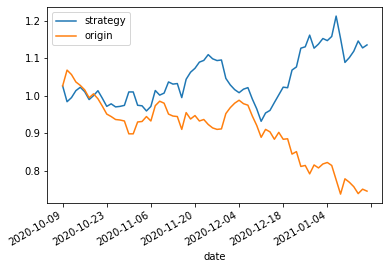

In [28]:
stock_X_test[['strategy', 'origin']].dropna().plot()
plt.gcf().autofmt_xdate()
plt.show()